In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("power_transformer_concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-2],df.iloc[:,-1],random_state=42,test_size=0.2)

In [13]:
#applying linear regression without transformation
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(X_test)

In [16]:
r2_score(y_test,y_pred)

0.4169961982494168

In [17]:
#cross checking with cross validation
lr = LinearRegression()
np.mean(cross_val_score(lr,df.iloc[:,:-2],df.iloc[:,-1],scoring="r2"))

0.16740306284772868

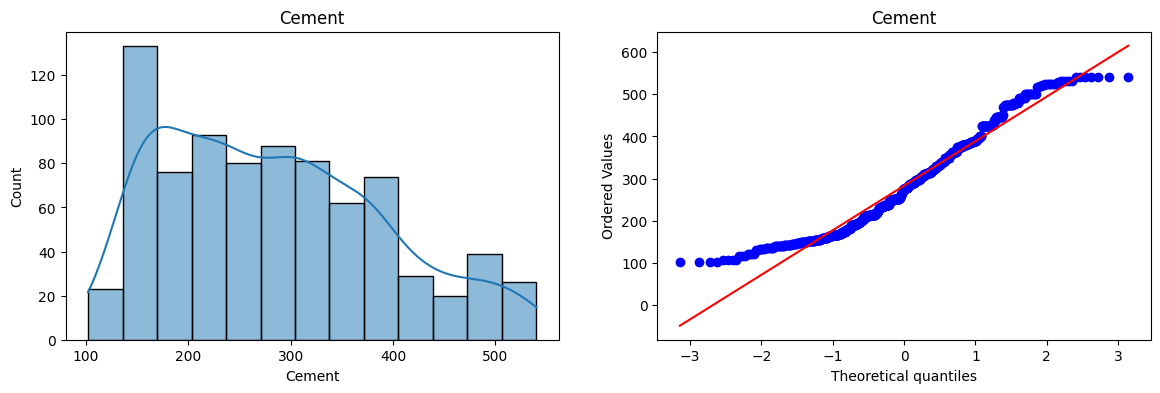

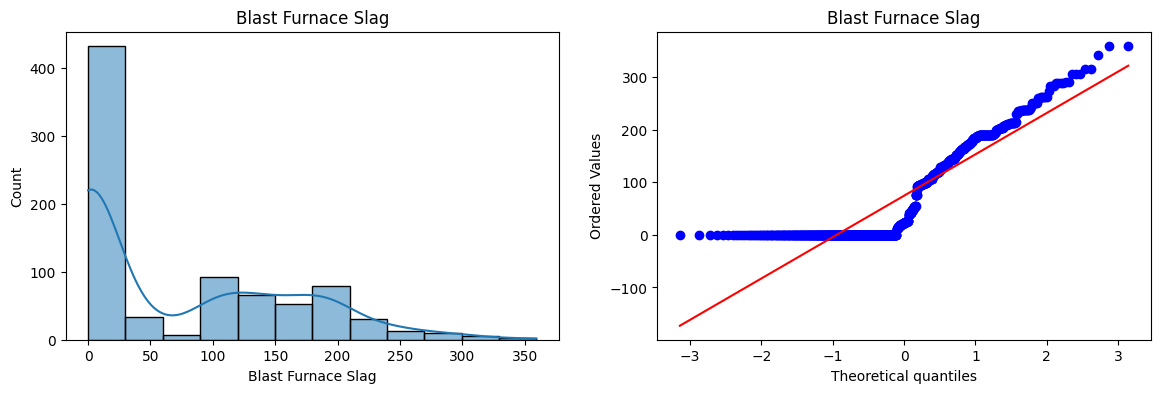

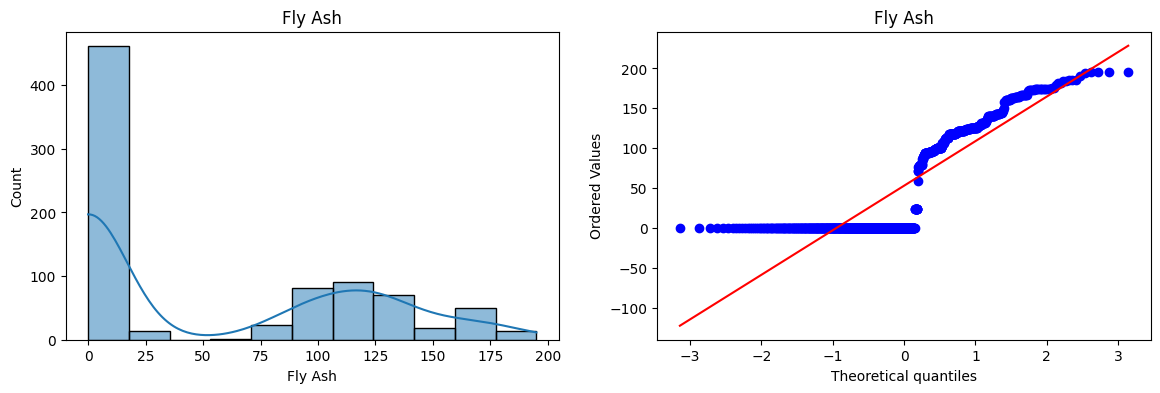

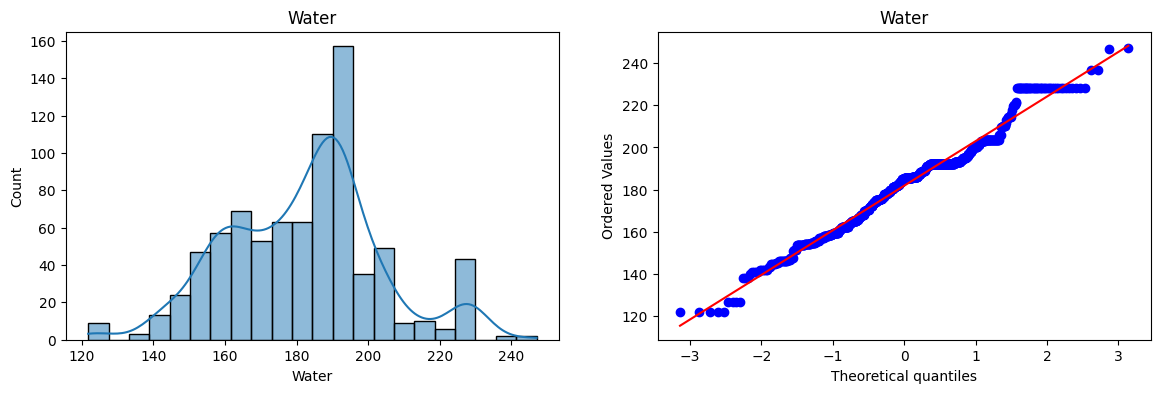

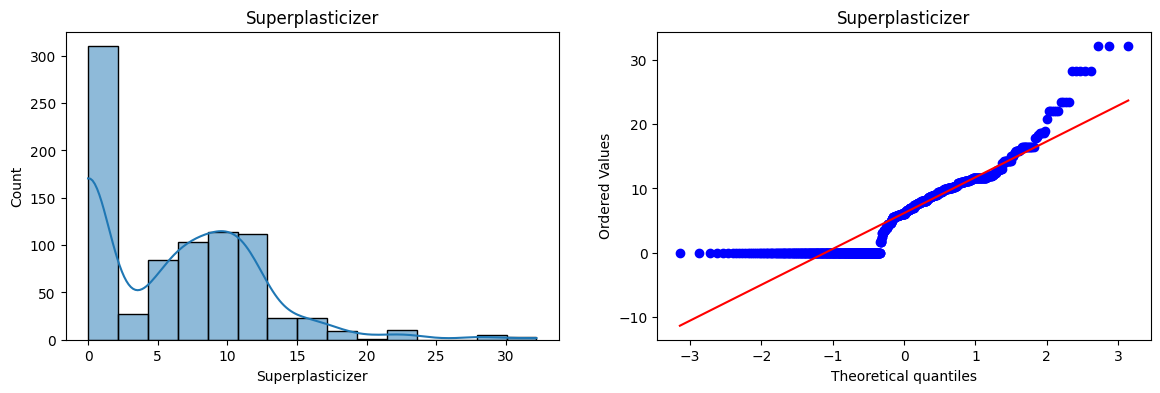

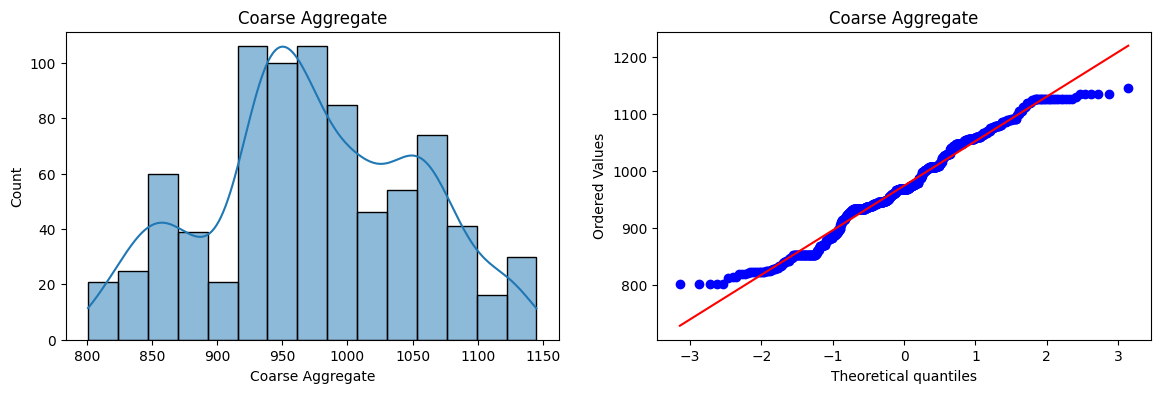

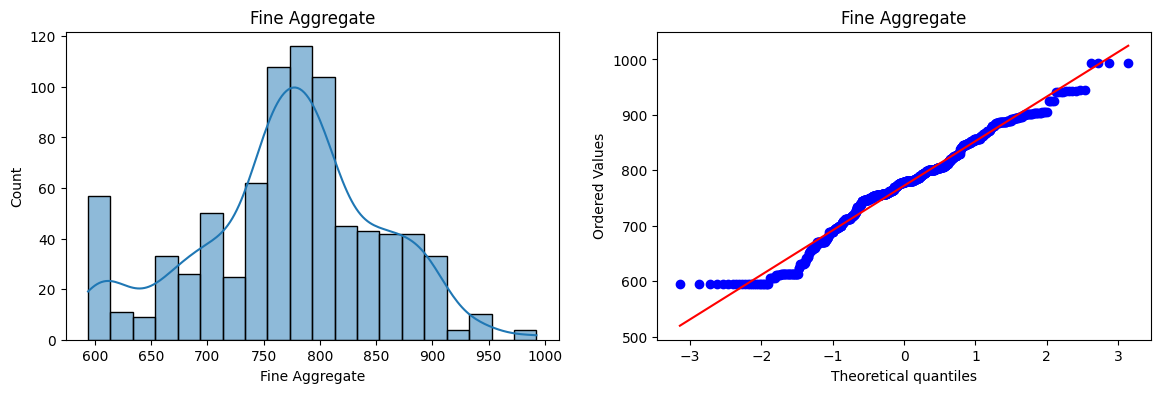

In [22]:
# score is too bad so we should check for distribution of all variables
%matplotlib inline
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()

In [24]:
#applying box-cos transformer
pt = PowerTransformer(method="box-cox")
X_train_transformed = pt.fit_transform(X_train+0.00000001)
X_test_transformed = pt.transform(X_test+0.000001)
pd.DataFrame({"columns":X_train.columns,"box-cox_lambdas":pt.lambdas_})

,columns,box-cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.020795
2,Fly Ash,-0.031170
3,Water,0.772681
4,Superplasticizer,0.077874
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018


In [25]:
#applying linear regression to transformed data 
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_test=lr.predict(X_test_transformed)
r2_score(y_test,y_pred)

0.9071145361318983

In [28]:
# The change is appreciable
# let's cross check with cross validation
lr = LinearRegression()
pt = PowerTransformer(method="box-cox")
X_train_transformed = pt.fit_transform(X_train+0.00000001)  
np.mean(cross_val_score(lr,X_train_transformed,y_train,scoring="r2"))

0.4500620259956783

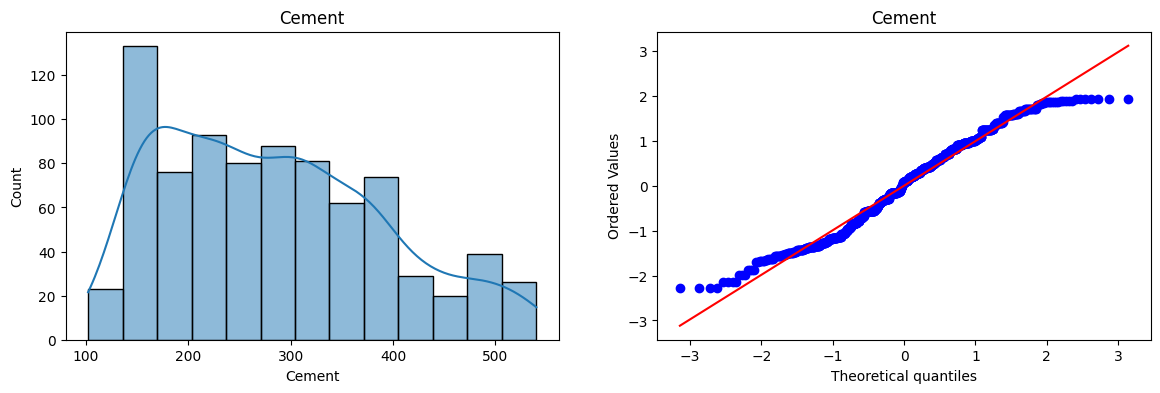

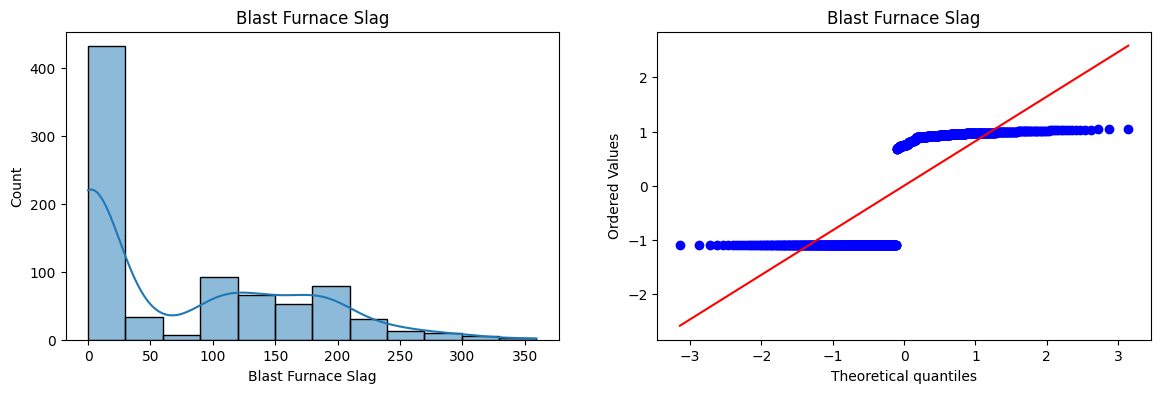

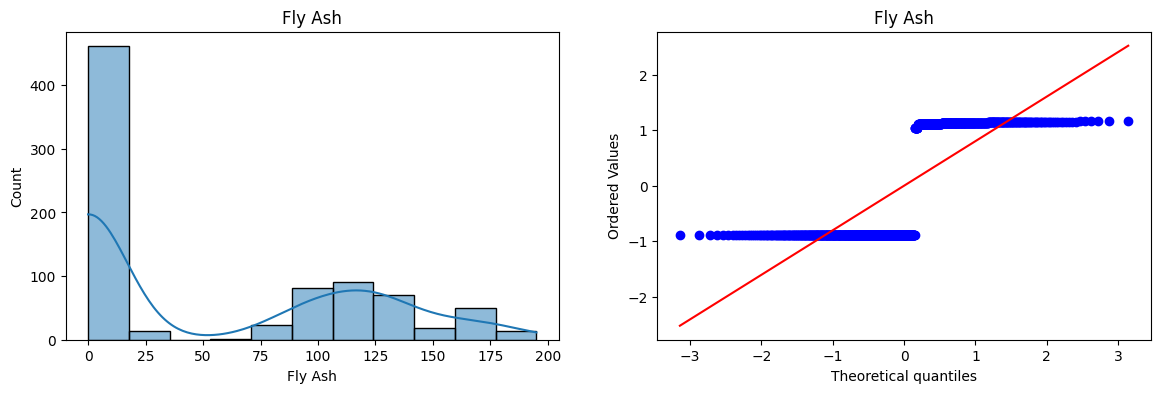

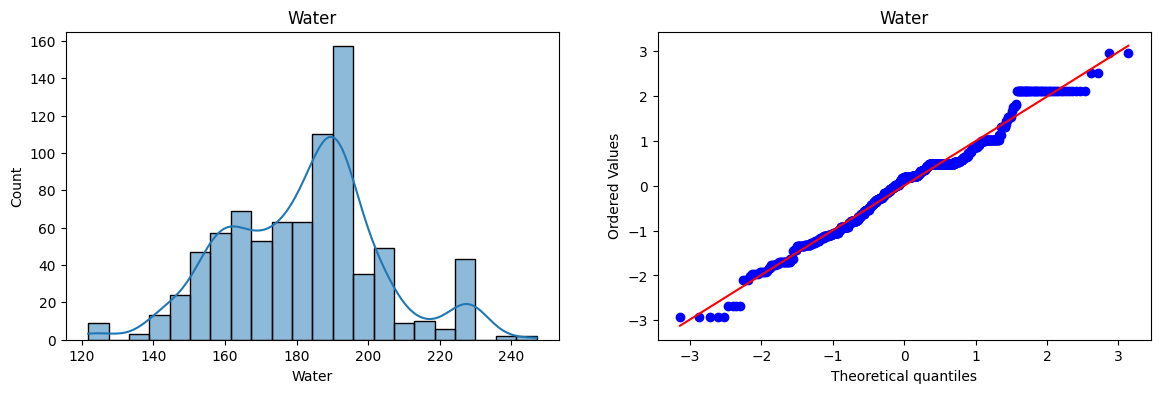

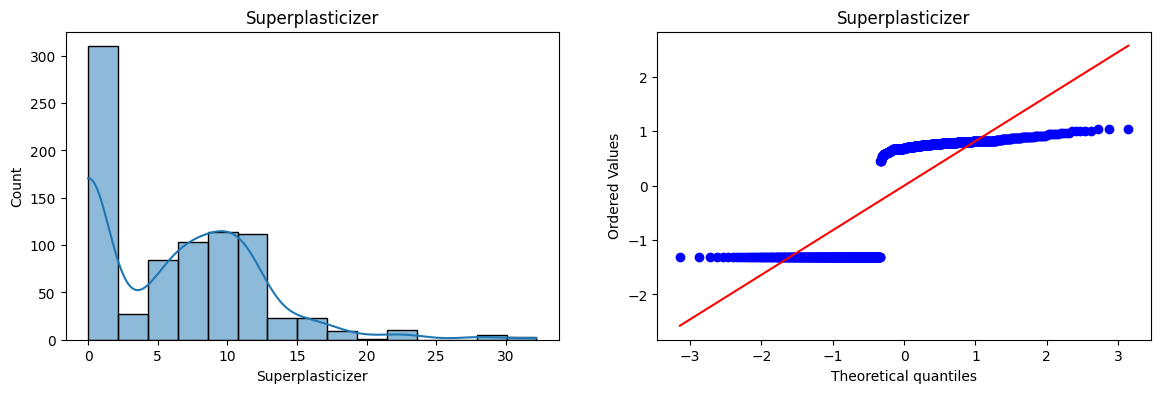

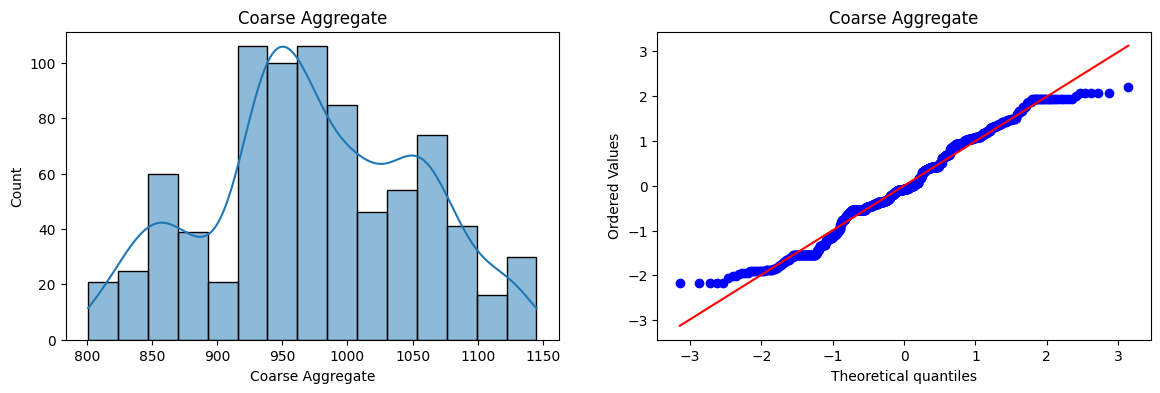

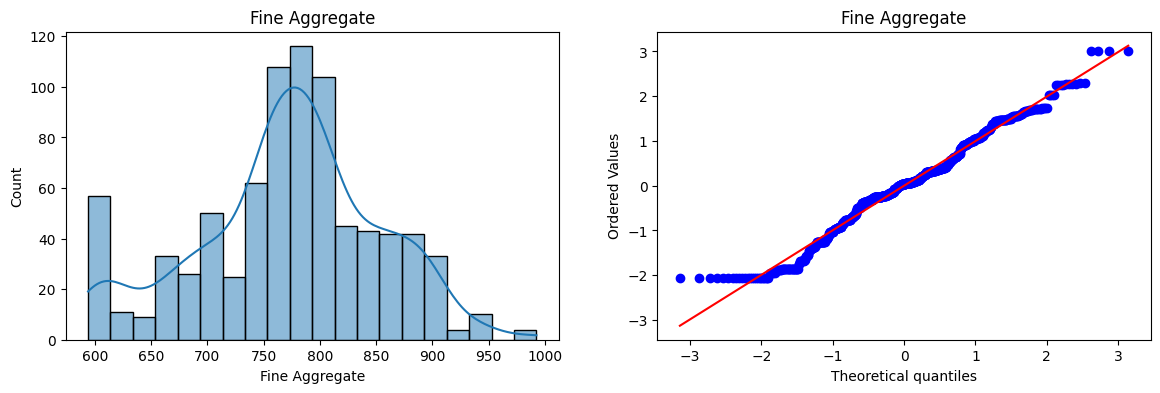

In [31]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_transformed[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()

In [32]:
#apply yeo-johnson transformation
pt1 = PowerTransformer()
X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2, y_train)
y_pred=lr.predict(X_test_transformed2)
r2_score(y_pred,y_test)

0.9688718096288189

In [35]:
# let's print lambdas
pd.DataFrame({"columns":X_train_transformed.columns,"yeo-johnson-lambda":pt1.lambdas_})

,columns,yeo-johnson-lambda
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085


In [37]:
#let's cross validate
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X_train)       
lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y_train,scoring='r2'))

0.4482076261622835

In [41]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

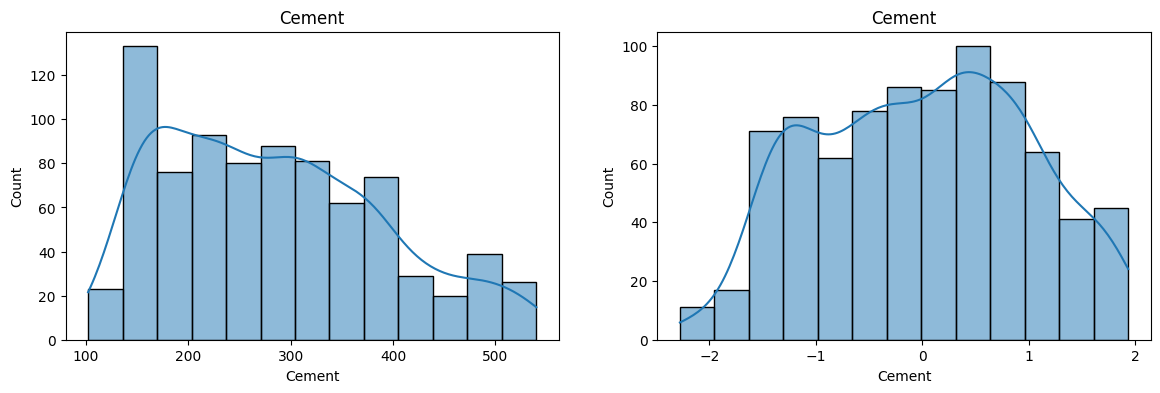

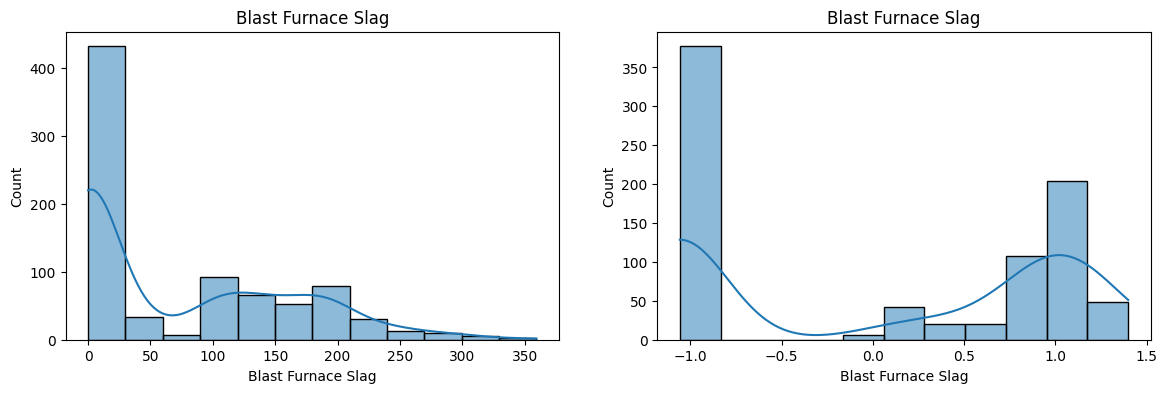

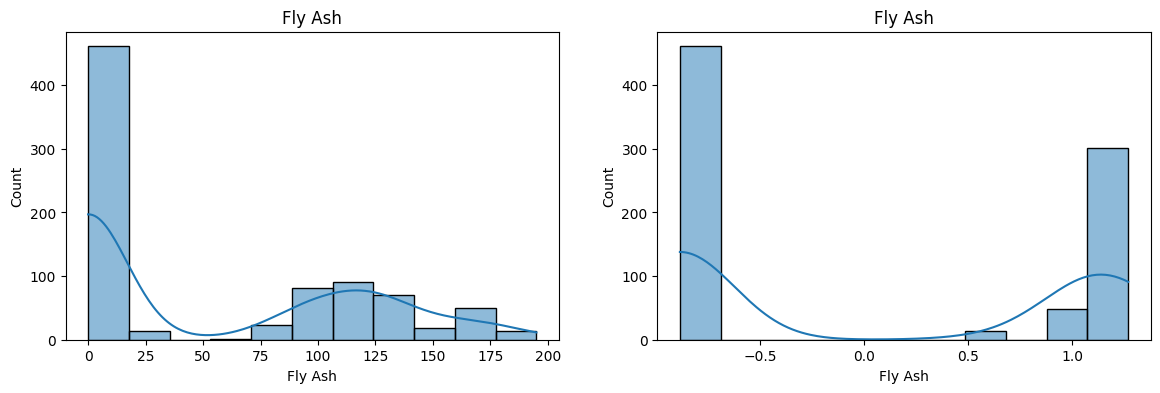

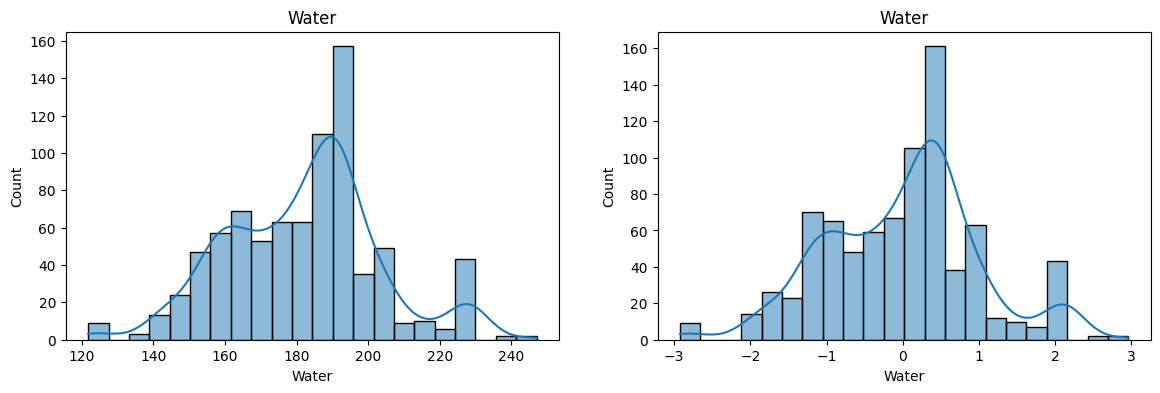

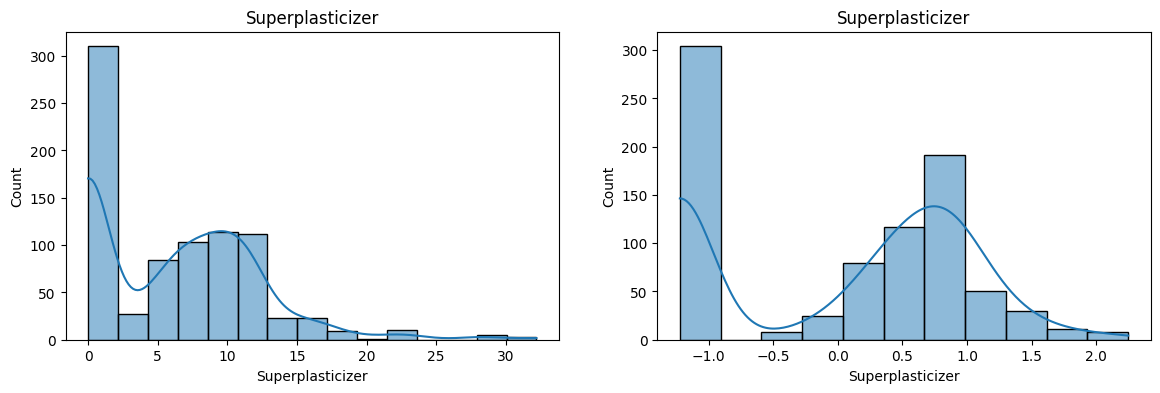

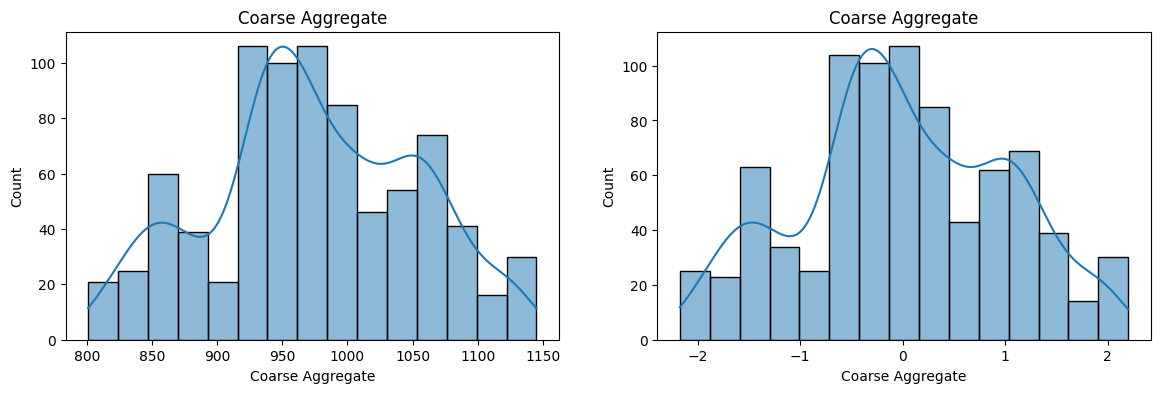

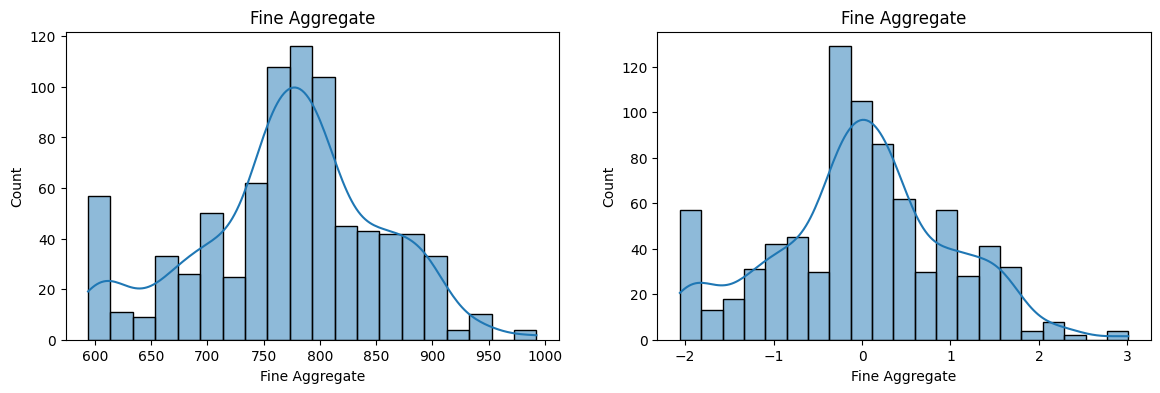

In [46]:
# comparison for yeo-johnson
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col) 
    plt.subplot(122)
    sns.histplot(X_train_transformed2[col],kde=True)
    plt.title(col)
    plt.show()

In [47]:
# side by side both lambdas
pd.DataFrame({"columns":X_train.columns, "Box-cox lamdas":pt.lambdas_,"yeo-jhonson lambdas":pt1.lambdas_})

,columns,Box-cox lamdas,yeo-jhonson lambdas
0,Cement,0.174348,0.213025
1,Blast Furnace Slag,0.015715,0.020476
2,Fly Ash,-0.161447,-0.038218
3,Water,0.771307,0.958936
4,Superplasticizer,0.253935,0.304951
5,Coarse Aggregate,1.130050,1.192751
6,Fine Aggregate,1.783100,1.975085
